In [16]:
 #Description : Sentiment Analysis Program

In [17]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Login2.csv to Login2.csv


In [19]:
# Get the data
log = pd.read_csv('Login2.csv')

In [20]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Key     5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [26]:
#Twitter API credentials
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accessToken = log['Key'][2]
accessTokenSecret = log['Key'][3]

In [28]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [30]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = "en", tweet_mode="extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i +=1

Show the 5 recent tweets
1) I am truly grateful for his wisdom and leadership, and most of all for his enduring friendship. Warren will continue to inspire our foundation as we work to fight poverty and help millions of people live healthier lives. https://t.co/qYYl1APURx

2) I will always have a deep sense of accountability to Warren, paying close attention to the data to track our progress and identify areas where we can do better. But the value of Warren’s gift goes beyond anything that can be measured.

3) Should you pick your nose?

You can read an excerpt from Matt Richtel’s fascinating book about the immune system on my blog to find the answer: https://t.co/cgfc1aUzPA https://t.co/Uc7vqT2B1m

4) The journalist @ElizKolbert has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions. https://t.co/8gt4I8oxXc

5) The persistence 

In [31]:
#Create a dataframe with a column caleed Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the data
df.head()

,Tweets
0,I am truly grateful for his wisdom and leaders...
1,I will always have a deep sense of accountabil...
2,Should you pick your nose?\n\nYou can read an ...
3,The journalist @ElizKolbert has created a fasc...
4,The persistence of countless Rotarians gives m...


In [32]:
#clean the text 

#Create function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @ mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link

  return text


In [33]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [34]:
df

,Tweets
0,I am truly grateful for his wisdom and leaders...
1,I will always have a deep sense of accountabil...
2,Should you pick your nose?\n\nYou can read an ...
3,The journalist has created a fascinating beat...
4,The persistence of countless Rotarians gives m...
...,...
95,I enjoyed spending time with recently in Seat...
96,"I’m thrilled to join , _RDG, , , , , , and Mo..."
97,": In 2020, global health went local. \n\nCOVID..."
98,: Only 3% of Black students learn computer sci...


In [35]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


In [36]:
df

,Tweets,Subjectivity,Polarity
0,I am truly grateful for his wisdom and leaders...,0.500000,0.318182
1,I will always have a deep sense of accountabil...,0.450000,0.250000
2,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000
3,The journalist has created a fascinating beat...,0.783333,0.633333
4,The persistence of countless Rotarians gives m...,0.500000,0.000000
...,...,...,...
95,I enjoyed spending time with recently in Seat...,0.475000,0.250000
96,"I’m thrilled to join , _RDG, , , , , , and Mo...",0.700000,0.600000
97,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000
98,: Only 3% of Black students learn computer sci...,0.657778,-0.002222


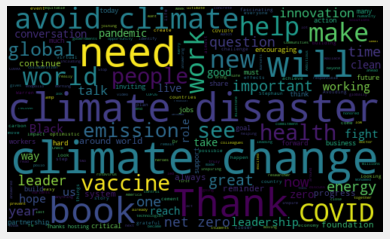

In [43]:
 # Plot the Word Cloud
 allWords = ' '.join( [twts for twts in df['Tweets']] )
 wordCloud = wordcloud.WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

 plt.imshow(wordCloud, interpolation= "bilinear")
 plt.axis('off')
 plt.show()

In [44]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataFrame
df

,Tweets,Subjectivity,Polarity,Analysis
0,I am truly grateful for his wisdom and leaders...,0.500000,0.318182,Positive
1,I will always have a deep sense of accountabil...,0.450000,0.250000,Positive
2,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000,Positive
3,The journalist has created a fascinating beat...,0.783333,0.633333,Positive
4,The persistence of countless Rotarians gives m...,0.500000,0.000000,Neutral
...,...,...,...,...
95,I enjoyed spending time with recently in Seat...,0.475000,0.250000,Positive
96,"I’m thrilled to join , _RDG, , , , , , and Mo...",0.700000,0.600000,Positive
97,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000,Neutral
98,: Only 3% of Black students learn computer sci...,0.657778,-0.002222,Negative


In [48]:
 # Print all of the positive tweets
 j=1
 sortedDF = df.sort_values(by=['Polarity'])
 for i in range(0, sortedDF.shape[0]):
   if (sortedDF['Analysis'][i] == 'Positive'):
     print(str(j) + ') '+sortedDF['Tweets'][i])
     print()
     j+=1 


1) I am truly grateful for his wisdom and leadership, and most of all for his enduring friendship. Warren will continue to inspire our foundation as we work to fight poverty and help millions of people live healthier lives. 

2) I will always have a deep sense of accountability to Warren, paying close attention to the data to track our progress and identify areas where we can do better. But the value of Warren’s gift goes beyond anything that can be measured.

3) Should you pick your nose?

You can read an excerpt from Matt Richtel’s fascinating book about the immune system on my blog to find the answer:  

4) The journalist  has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions. 

5) I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s lik

In [49]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j+=1

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) : Black folks have questions about the COVID-1

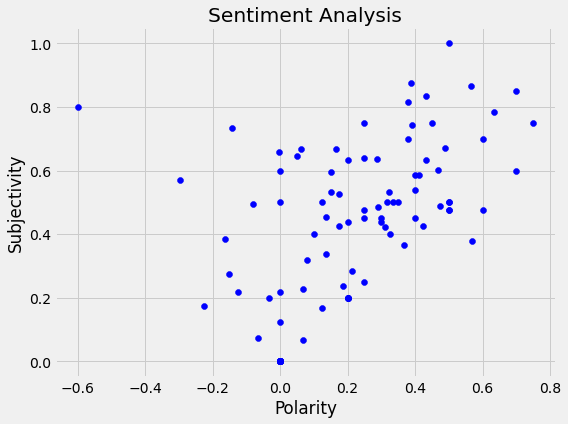

In [51]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df["Polarity"][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [55]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

68.0

In [58]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1)

11.0

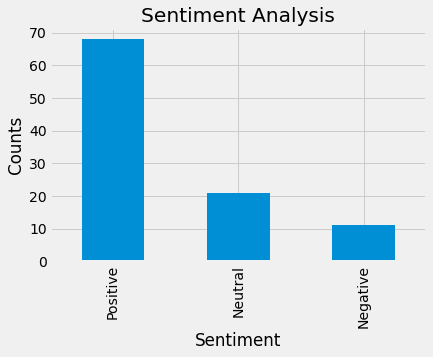

In [60]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()